In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading data
Rav4 = pd.read_csv('RAV4-142-Spring2021.csv')
Rav4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MonthNumeric  120 non-null    int64  
 1   MonthFactor   120 non-null    object 
 2   Year          120 non-null    int64  
 3   RAV4Sales     120 non-null    int64  
 4   Unemployment  120 non-null    float64
 5   RAV4Queries   120 non-null    int64  
 6   CPIAll        120 non-null    float64
 7   CPIEnergy     120 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 7.6+ KB


In [3]:
Rav4.head()

,MonthNumeric,MonthFactor,Year,RAV4Sales,Unemployment,RAV4Queries,CPIAll,CPIEnergy
0,1,January,2011,11196,9.1,29,221.187,229.258
1,2,February,2011,12562,9.0,29,221.898,232.068
2,3,March,2011,16082,9.0,29,223.046,240.079
3,4,April,2011,15586,9.1,27,224.093,247.977
4,5,May,2011,8624,9.0,28,224.806,250.744


In [5]:
# Problem 2
# a) Start  by  splitting  the  data  into  a  training  set  and  testing  set. The trainingset should contain all observations for 2011 through 2016.  
#The testing set should have allobservations for 2017 through 2020.

Rav4_train = Rav4[(Rav4['Year'] >= 2011) & (Rav4['Year'] <= 2016)]
Rav4_test = Rav4[(Rav4['Year'] >= 2017) & (Rav4['Year'] <= 2020)]

In [6]:
#i) What  is  the  linear  regression  equation  produced  by  your  model,  and  how  should  one interpret the coefficients for the independent variables?  
#Consider interpretability issues when  writing  down  the  equation  (e.g.,  do  not  just  copy  and  paste  the  output  from Python)

The code below is the ols regression which takes in following variable: Unemployment, RAV4Queries, CPIAll, and CPIEnergy. The coefficient value of these variable represent how much the mean dependent variable changes given a one unit shift in the independent variable while holding other variables in the model constant. Further, each coefficient represents the additional effect of adding this variable to the model. This means that the coefficients will change depending on which variables are added and removed.

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

ols_1 = smf.ols(formula='RAV4Sales ~ Unemployment + RAV4Queries + CPIAll + CPIEnergy ', data = Rav4_train)
model_1 = ols_1.fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     71.42
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.93e-23
Time:                        21:30:10   Log-Likelihood:                -683.31
No. Observations:                  72   AIC:                             1377.
Df Residuals:                      67   BIC:                             1388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.961e+04   9.36e+04      0.210   

In [8]:
#ii) How did you select the variables to include in your linear regression model?
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [9]:
cols_1 = ['Unemployment', 'RAV4Queries', 'CPIAll', 'CPIEnergy']
VIF(Rav4_train, cols_1)

Unemployment    37.437684
RAV4Queries      6.231404
CPIAll          28.216088
CPIEnergy        7.220536
dtype: float64

After checking which features have the highest VIF, I decided to remove Unemployment which has a high VIF in order to produce a better model.

In [10]:
ols_2 = smf.ols(formula='RAV4Sales ~ RAV4Queries + CPIAll + CPIEnergy ', data = Rav4_train)
model_2 = ols_2.fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     91.21
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           8.73e-24
Time:                        21:30:10   Log-Likelihood:                -684.99
No. Observations:                  72   AIC:                             1378.
Df Residuals:                      68   BIC:                             1387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.379e+05   3.21e+04     -4.290      

In [11]:
cols_2 = ['RAV4Queries', 'CPIAll', 'CPIEnergy']
VIF(Rav4_train, cols_2)

RAV4Queries    5.952056
CPIAll         3.876882
CPIEnergy      2.610675
dtype: float64

Next, I removed RAV4Queries as it has the highest VIF among the three features.

In [12]:
#iii) Do the signs of the model’s coefficients make sense?  Are you reasonably sure that thesigns are correct?

In the first model, we see that our ols regression model has a negative coefficient on Unemployment and positive coefficients on other three variables. From VIF, we see that Unemployment and CPI.ALL have the highest VIF out of the four. On the second ols regression model, we see that CPI Energy has a negative coefficient. We can reason that in cases where there is a negative coefficient, it means that dependent variable negatively correlates to the independent variables and we remove those variables with opposite signs based on the values from our VIF.

In [13]:
#iv) How well does the model predict training set observations? Can you justify the model’s performance on the training data with a quantifiable metric?
ols_3 = smf.ols(formula='RAV4Sales ~ CPIAll + CPIEnergy', data = Rav4_train)
model_3 = ols_3.fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.85e-24
Time:                        21:30:11   Log-Likelihood:                -686.84
No. Observations:                  72   AIC:                             1380.
Df Residuals:                      69   BIC:                             1387.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.729e+05   2.68e+04     -6.447      0.0

In [14]:
cols_3 = ['CPIAll', 'CPIEnergy']
VIF(Rav4_train, cols_3)

CPIAll       1.67804
CPIEnergy    1.67804
dtype: float64

We can tell that our model is moderately predicting our training set observations. Upon removing three variables and iterating our model, we now see a VIF value that is around 1 for both variables: CPIAll, CPIEnergy. Although the R-squared does not really entail everything, our ols_3 model R-squared didn't deviate a lot from where it started off from. Removing variables that had a high VIF value had a huge impact in optimizing the overall VIF values, the amount of multicollinearity.

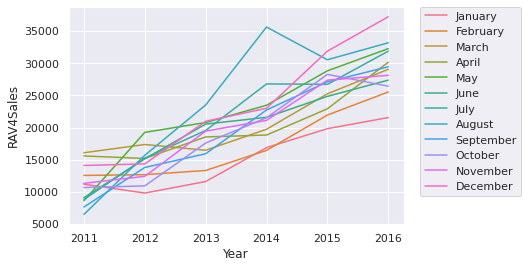

In [15]:
#Plot the sales of RAV4 versus Year, by different months
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
g = sns.lineplot(x="Year", y="RAV4Sales", hue="MonthFactor", data=Rav4_train)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

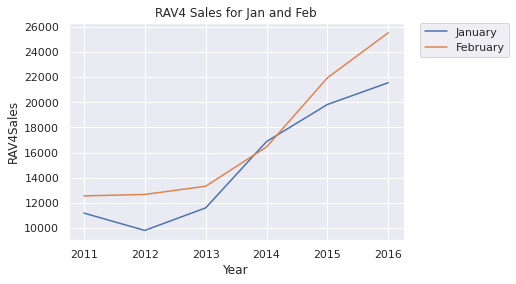

In [16]:
Rav4_train2 = Rav4_train[(Rav4_train['MonthFactor'] == 'January') | (Rav4_train['MonthFactor'] == 'February')]
g = sns.lineplot(x="Year", y="RAV4Sales", hue="MonthFactor", data=Rav4_train2).set_title("RAV4 Sales for Jan and Feb")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
#Using One hot encoding to use specific MonthFactors
from sklearn.feature_extraction import DictVectorizer
all_columns = ['MonthFactor', 'Year', 'RAV4Sales', 'Unemployment', 
               'RAV4Queries', 'CPIAll','CPIEnergy']

records = Rav4_train[all_columns].to_dict(orient='records')
encoder = DictVectorizer(sparse=False)
encoded_X = encoder.fit_transform(records)
encoded_X

array([[2.21187e+02, 2.29258e+02, 0.00000e+00, ..., 1.11960e+04,
        9.10000e+00, 2.01100e+03],
       [2.21898e+02, 2.32068e+02, 0.00000e+00, ..., 1.25620e+04,
        9.00000e+00, 2.01100e+03],
       [2.23046e+02, 2.40079e+02, 0.00000e+00, ..., 1.60820e+04,
        9.00000e+00, 2.01100e+03],
       ...,
       [2.41641e+02, 1.95541e+02, 0.00000e+00, ..., 2.64290e+04,
        4.90000e+00, 2.01600e+03],
       [2.41993e+02, 1.95927e+02, 0.00000e+00, ..., 2.81160e+04,
        4.70000e+00, 2.01600e+03],
       [2.42712e+02, 2.00139e+02, 0.00000e+00, ..., 3.72140e+04,
        4.70000e+00, 2.01600e+03]])

In [18]:
#To get a better sense of the transformed data, we display it with the column names
Rav4_train_mf = pd.DataFrame(data=encoded_X, columns=encoder.feature_names_)
Rav4_train_mf22 = Rav4_train_mf.rename(columns={"MonthFactor=January": "Jan",
                                               "MonthFactor=February": "Feb",
                                               "MonthFactor=March": "Mar",
                                               "MonthFactor=April": "Apr",
                                               "MonthFactor=May": "May",
                                               "MonthFactor=June": "Jun",
                                               "MonthFactor=July": "Jul",
                                               "MonthFactor=August": "Aug",
                                               "MonthFactor=September": "Sep",
                                               "MonthFactor=October": "Oct",
                                               "MonthFactor=November": "Nov",
                                               "MonthFactor=December": "Dec"})
Rav4_train_mf22.head()

,CPIAll,CPIEnergy,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,RAV4Queries,RAV4Sales,Unemployment,Year
0,221.187,229.258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,11196.0,9.1,2011.0
1,221.898,232.068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,12562.0,9.0,2011.0
2,223.046,240.079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.0,16082.0,9.0,2011.0
3,224.093,247.977,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,15586.0,9.1,2011.0
4,224.806,250.744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,28.0,8624.0,9.0,2011.0


In [19]:
Rav4_train_mf2 = Rav4_train_mf22[(Rav4_train_mf22['Year'] >= 2011) & (Rav4_train_mf22['Year'] <= 2016)]

In [20]:
#b 
#Construct a new linear regression model using theMonthFactorvariable as an independentvariable, in addition to all four of the variables you used at the start of part(a)
ols_4 = smf.ols(formula='RAV4Sales ~ MonthFactor + Unemployment + RAV4Queries + CPIAll + CPIEnergy', data = Rav4_train)
model_4 = ols_4.fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     28.51
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           8.55e-21
Time:                        21:30:16   Log-Likelihood:                -665.48
No. Observations:                  72   AIC:                             1363.
Df Residuals:                      56   BIC:                             1399.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Since MonthFactor was a categorical variable, I performed a one hot encoding tranformation on MonthFactor: created a new column for every unique value: month in a categorical variable. The column contains 1 if the variable had the corresponding value and 0 otherwise. After creating a new dataframe Rav4_train_mf2, which includes 11 new variables (April missing from original df). I decided to use Jan and Feb as a new variable to my new model first to see whether this has any impacts. After doing so, I found out that my VIF values has resulted very low, all being around 1. My R^2 also resulted in 0.818, which is considered pretty high.

In [21]:
ols_5 = smf.ols(formula='RAV4Sales ~ Jan + Feb + CPIAll + CPIEnergy', data = Rav4_train_mf2)
model_5 = ols_5.fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     75.41
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           4.43e-24
Time:                        21:30:18   Log-Likelihood:                -681.72
No. Observations:                  72   AIC:                             1373.
Df Residuals:                      67   BIC:                             1385.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.533e+05   2.61e+04     -5.876      0.0

In [22]:
cols_5 = ['Jan', 'Feb', 'CPIAll', 'CPIEnergy']
VIF(Rav4_train_mf2, cols_5)

Jan          1.048590
Feb          1.029488
CPIAll       1.770659
CPIEnergy    1.727375
dtype: float64

In [23]:
#b
#i) Describe your new model. What is the regression equation? (Do not simply copy andpaste output  from  Python. How  should  one  interpret  the  coefficients  of  each  of  theMonthFactordummy variables?

Our new model has a higher r-squared value. It has increased from previous models after including MonthFactor as one of our variable.

Our new regression equation:
Y = 7.754e+04 + 1.1895(CPIEnergy) - 175.4430(CPIAll) + 228.4423(RAV4Queries) - 3687.3648(Unemployment) - 1879.2594(MonthFactor[T.September]) - 1808.4239(MonthFactor[T.October]) - 1540.1770(MonthFactor[T.November]) + 2010.0694(MonthFactor[T.May]) + 466.8540(MonthFactor[T.March]) - 1426.1733(MonthFactor[T.June]) - 193.7079(MonthFactor[T.July]) - 4543.8071(MonthFactor[T.January]) - 2922.8349(MonthFactor[T.February]) +1885.2249(MonthFactor[T.December]) + 2422.0989(MonthFactor[T.August])

The dummy variable on the MonthFactor will be either 0 or 1 and it will be calculated with 0*beta_i or 1*beta_i

In [24]:
#ii) What is the training set R^2 for the new model? Which variables are significant?

The traiing set R^2 for the new model is now 0.884. Following variables are significant: Unemployment, RAV4Queries, CPIAll, CPIEnergy, MonthFactor

In [25]:
#iii) Do you think adding the independent variable MonthFactor improves the quality of themodel?  Why or why not?

Yes, adding the independent variable Month Factor has improved the quality of our regression model. The variable seem to help with prediction and contribute to the output of sales.

In [26]:
#iv) Can you think of a different way that you might use the given data to model seasonality? Do you think your new way would improve on the best model you have constructed sofar? 

To further improve our model, we could potentially add other features as well or incorporate other dataset and use those variables to build a better model. Such relevant dataset could possibly be a gas prices, number of license issued, or RAV4 inventory.

In [27]:
#c) Build a final model using a subset of the independent variables used in parts(a)and(b), providing a brief justification for the variables selected.  What is the training set R2and theOSR2(this is theR2of your model on the test set)?  Do you think your model wouldbe useful to Toyota?  Why or why not?

In [28]:
ols_final = smf.ols(formula='RAV4Sales ~ MonthFactor + CPIAll + CPIEnergy', data = Rav4_train)
model_final = ols_final.fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     29.08
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.26e-20
Time:                        21:30:26   Log-Likelihood:                -670.48
No. Observations:                  72   AIC:                             1369.
Df Residuals:                      58   BIC:                             1401.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
# Compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

OSR2(model_final, Rav4_train, Rav4_test, 'RAV4Sales')

0.7922709030686684

When building a model, we are only using our trainset and thus I thought it was most important to first look at the VIFs and R^2 when choosing independent variables. After doing some modeling above, I have decided to include MonthFactor, Unemployment, RAV4Queries, and CPIEnergy as my variables for my final model. Adding MonthFactor as one of my variable did improve my model after checking the output of VIF. R^2 is 0.884 for our train set and the OSR^2 is 0.769 for our test set. I think my final model would be useful to Toyota because my OSR^2 is 0.768 which is a quite high figure. Since OSR is a trial on real world performance, OSR^2 is a good metric to apply to test data whether our predictive models has out of sample predictability (predictive relationship).

In [30]:
#d) Now, build  a  new  regression  model  with  your  additional  chosen  feature  in  addition  to  thefeatures that you selected in part(c).  Does the new feature add any predictive value?  Justifyyour answer based on the results of your analysis.

In [31]:
#Loading data
weekly_gas = pd.read_csv('US Gasoline and Diesel Prices.csv')

I will be using column A1 as it represents weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)

In [32]:
#Parse only the Year from the Date column 
weekly_gas = weekly_gas.iloc[:,0:2]
weekly_gas['Year'] = pd.DatetimeIndex(weekly_gas['Date']).year
weekly_gas_1 = weekly_gas.iloc[2:]
del weekly_gas_1['Date']

In [33]:
#Make the constraints to be the same as our Rav4 train which is 2011 through 2016
weekly_gas_train = weekly_gas_1[(weekly_gas['Year'] >= 2011 ) & (weekly_gas_1['Year'] <= 2016)]
del weekly_gas_train['Year']
weekly_gas_train.head()
#Randomnly select 72 outputs as our Rav4 train also has 72 outputs
weekly_gas_train = weekly_gas_train.sample(72)
Rav4_train["A1"] = weekly_gas_train["A1"].tolist()

#rename column A1 to Gas Prices
Rav4_train= Rav4_train.rename(columns={"A1": "GasPrices"})

<ipython-input-33-884fcb5e8af0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekly_gas_train = weekly_gas_1[(weekly_gas['Year'] >= 2011 ) & (weekly_gas_1['Year'] <= 2016)]
<ipython-input-33-884fcb5e8af0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rav4_train["A1"] = weekly_gas_train["A1"].tolist()


In [34]:
ols_new = smf.ols(formula='RAV4Sales ~ GasPrices + MonthFactor + CPIAll + CPIEnergy', data = Rav4_train)
model_new = ols_new.fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:              RAV4Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     27.95
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.00e-20
Time:                        21:30:28   Log-Likelihood:                -668.85
No. Observations:                  72   AIC:                             1368.
Df Residuals:                      57   BIC:                             1402.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [35]:
cols_final = ['GasPrices', 'CPIAll', 'CPIEnergy']
VIF(Rav4_train, cols_final)

GasPrices    1.012971
CPIAll       1.687050
CPIEnergy    1.699803
dtype: float64

The GasPrices column, which represents weekly U.S. All Grades All Formulation Retail Gasoline Factors seem to add some additional predictive value to the new model. I have added GasPrices column in addition to the features that I have selected from part c. The R^2 is 0.860 and the VIF values all result in 1. Based on final model analysis, I can conclude that GasPrices variable seem to add some influence. 